
### Clustering Analysis on a Customers Dataset
Consider that you possess a dataset of customer information, and your task is to perform customer segmentation on this historical data. Customer segmentation involves dividing a customer base into distinct groups based on shared characteristics. This approach is crucial because it allows a business to target specific groups effectively and optimize the allocation of marketing resources. For instance, one segment might consist of high-profit, low-risk customers—those more likely to make purchases or subscribe to services, whom the business aims to retain. Another segment could be customers from non-profit organizations, among others.

In this assignment, you will perform clustering analysis on the Mall Customers Dataset. This dataset includes the `Age`, `Annual Income`, and `Spending Score` of customers. You will use K-Means and DBSCAN clustering algorithms to segment customers based on their behaviors and traits. The primary objective is to understand customer segments to tailor marketing strategies effectively.

---

#### Step 1: Data Loading and Initial Exploration

**Exercise 1:**
- Load the Mall Customers dataset from the following URL: 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv'.
- Use pandas to read the data and display the first few rows. 
- Generate basic statistics of the data using `.describe()`.


In [1]:
import pandas as pd
import io
import requests

# Load the data
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv'

s = requests.get(url).content
mall_customers = pd.read_csv(io.StringIO(s.decode('utf-8')))
mall_customers.head()
mall_customers.describe()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


#### Step 2: Data Preprocessing

**Exercise 2:**
- As observed, the "Address" field in this dataset is a categorical variable. The k-means algorithm, which relies on Euclidean distance, isn't suitable for categorical data because this type of distance measure doesn't make sense for discrete variables. Therefore, exclude this feature and proceed with the clustering analysis.
- Now  normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.





In [4]:
from sklearn.preprocessing import StandardScaler

# Write your code here

if 'Address' in mall_customers.columns:
    print("Dropping Column")
    mall_customers = mall_customers.drop(columns=['Address'])
if 'Customer Id' in mall_customers.columns:
    print("Dropping Column")
    mall_customers = mall_customers.drop(columns=['Customer Id'])
if 'Defaulted' in mall_customers.columns:
    print("Dropping Column")
    mall_customers = mall_customers.drop(columns=['Defaulted'])
scaler = StandardScaler()
normalized_data = scaler.fit_transform(mall_customers)

Dropping Column
Dropping Column
Dropping Column


#### Step 3: Applying K-Means Clustering

**Exercise 3:**
- Apply K-Means clustering on the processed data. Choose a suitable number of clusters (start with `k=3`).
- Fit the model and then predict the cluster labels.
- Add these labels as a new column in the DataFrame and create a new DataFrame.
- Calculate the centroid value of each class.



In [5]:
from sklearn.cluster import KMeans

# Write your code here
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(normalized_data)
cluster_labels = kmeans.predict(normalized_data)
mall_customers['Cluster'] = cluster_labels
clustered_data = mall_customers.copy()
centroids = kmeans.cluster_centers_
centroids_original_scale = scaler.inverse_transform(centroids)
centroids_df = pd.DataFrame(centroids_original_scale, columns=mall_customers.columns[:-1])
centroids_df['Cluster'] = range(len(centroids))
print("Cluster Centroids:")
print(centroids_df)

Cluster Centroids:
         Age       Edu  Years Employed      Income  Card Debt  Other Debt  \
0  41.464539  1.556738       12.989362   56.226950   1.297486    2.730422   
1  29.819742  1.716738        4.334764   28.019313   0.905573    1.810951   
2  41.039216  2.107843       15.666667  105.500000   5.415775    9.834069   

   DebtIncomeRatio  Cluster  
0         7.979078        0  
1         9.890773        1  
2        17.516667        2  


**Exercise 4:**
- Plot the results using a scatter plot. Use `Age` as the x-axis and `Income` as the y-axis. Color the points based on the cluster labels.
- Interpret the plot. What does each cluster seem to represent in terms of customer behavior?


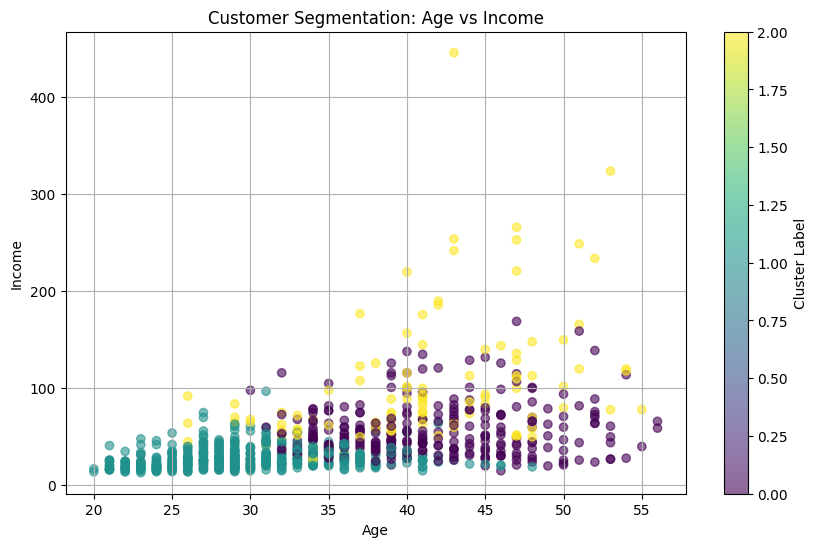

In [6]:
import matplotlib.pyplot as plt

# Write your code here
plt.figure(figsize=(10, 6))
plt.scatter(mall_customers['Age'], mall_customers['Income'], c=mall_customers['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Customer Segmentation: Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()

The customer segmentation displayed in the scatter plot reveals three distinct clusters based on age and income. Cluster 0 (purple) includes middle-income earners (below 100) across ages 25 to 45. Cluster 1 (yellow) represents wealthier, more established customers, aged 35 to 55, with higher incomes (100–400). Cluster 2 (teal) consists of younger individuals, aged 20 to 35, with lower incomes (below 100).

#### Step 4: Applying DBSCAN Clustering

**Exercise 5:**
- Apply DBSCAN to the same dataset. Start with `eps=0.5` and `min_samples=5`.
- Fit the model and then predict the cluster labels.
- Determine the count of predicted classes. Adjust 'eps' and 'min_samples' to attain a total of three classes.
- Add these labels as a new column in your DataFrame and create a new DataFrame.

In [7]:
from sklearn.cluster import DBSCAN

# Write your code here
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(normalized_data)
dbscan_labels = dbscan.labels_
unique_classes = set(dbscan_labels)
print(f"Unique classes (clusters): {unique_classes} (Total: {len(unique_classes)})")
unique_classes = set(dbscan_labels)
print(f"Adjusted unique classes (clusters): {unique_classes} (Total: {len(unique_classes)})")
mall_customers['DBSCAN_Cluster'] = dbscan_labels
dbscan_clustered_data = mall_customers.copy()
print(dbscan_clustered_data[['Age', 'Income', 'DBSCAN_Cluster']].head())

Unique classes (clusters): {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(-1)} (Total: 7)
Adjusted unique classes (clusters): {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(-1)} (Total: 7)
   Age  Income  DBSCAN_Cluster
0   41      19              -1
1   47     100              -1
2   33      57              -1
3   29      19               0
4   47     253              -1


**Exercise 6:**
- Plot the results using the same scatter plot setup as in Exercise 4.
- Compare the results with K-Means. How does DBSCAN differ in terms of cluster formation?

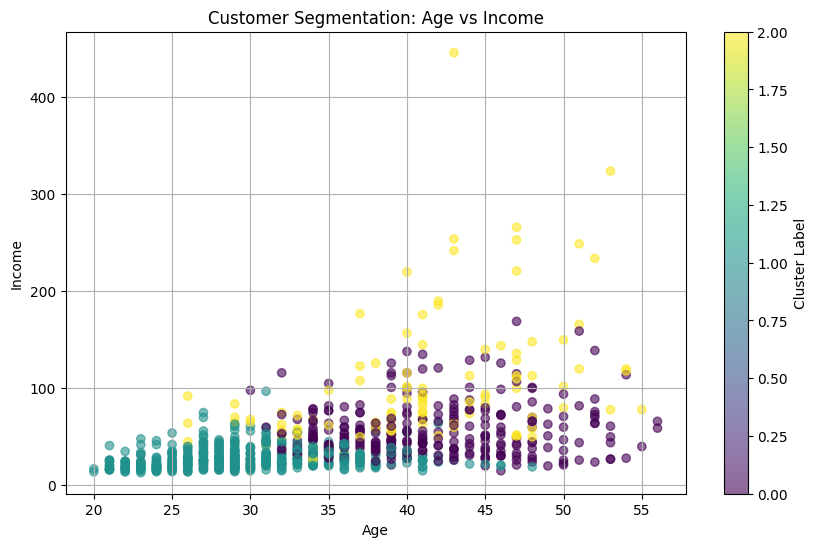

In [8]:
# Write your code here
plt.figure(figsize=(10, 6))
plt.scatter(mall_customers['Age'], mall_customers['Income'], c=mall_customers['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Customer Segmentation: Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()


DBSCAN forms clusters based on the density of data points, allowing it to identify arbitrary shapes and effectively handle noise by labeling outliers. Unlike K-Means, it does not require a predefined number of clusters, making it more adaptable to various datasets.

#### Step 5: Evaluation and Interpretation

**Exercise 7:**
- Calculate and compare the silhouette scores for both K-Means and DBSCAN.
- Discuss the strengths and weaknesses of each clustering method based on the dataset and the results obtained.

In [9]:
from sklearn.metrics import silhouette_score

# Write your code here
unique_dbscan_labels = set(mall_customers['DBSCAN_Cluster'])
print(f"Unique DBSCAN Cluster Labels: {unique_dbscan_labels}")
print(f"Number of noise points: {list(mall_customers['DBSCAN_Cluster']).count(-1)}")
kmeans_score = silhouette_score(normalized_data, mall_customers['Cluster'])
print(f"Silhouette Score for K-Means: {kmeans_score:.4f}")
if len(unique_dbscan_labels) > 1 and -1 in unique_dbscan_labels:
    valid_labels = mall_customers['DBSCAN_Cluster'] != -1
    dbscan_score = silhouette_score(normalized_data[valid_labels], 
                                     mall_customers['DBSCAN_Cluster'][valid_labels])
    print(f"Silhouette Score for DBSCAN: {dbscan_score:.4f}")

Unique DBSCAN Cluster Labels: {0, 1, 2, 3, 4, 5, -1}
Number of noise points: 615
Silhouette Score for K-Means: 0.2172
Silhouette Score for DBSCAN: 0.1385


The results of K-Means silhouette score indicates that the clusters are reasonably distinct but still overlap slightly. K-Means is simple to use and fast, but it struggles with irregularly formed clusters and is prone to outliers. DBSCAN discovered five clusters but also recognized numerous points as noise, resulting in a lower silhouette score. DBSCAN handles noise effectively and can identify clusters of various shapes, but it requires careful tuning of its settings and may not function well with clusters of varying density.